<a href="https://colab.research.google.com/github/shrikant131/FeatureEngineering/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering on DK Housing Prices Dataset

## Identification of Attribute Types

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('DKHousingPricesSample100k.csv')

# Display the first few rows of the dataset
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,16,Villa,regular_sale,1997,6500000,-3.0,5,142.0,45774.650,Spættevej 16,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
1,2024-10-24,2024Q4,13,Apartment,regular_sale,1885,3400000,0.0,2,46.0,73913.050,"Jakob Dannefærds Vej 10B, 4. th",1973,Frederiksberg C,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
2,2024-10-23,2024Q4,60,Villa,regular_sale,1949,4550000,-4.0,4,112.0,40625.000,Vestre Plantagevej 3,2680,Solrød Strand,"Capital, Copenhagen",Zealand,3.1,NaN,NaN
3,2024-10-23,2024Q4,29,Villa,regular_sale,2001,1630000,-12.0,4,186.0,8763.440,Toftebjerg 3,4400,Kalundborg,Other islands,Zealand,3.1,NaN,NaN
4,2024-10-22,2024Q4,92,Apartment,regular_sale,1965,1975000,-10.0,3,82.0,24085.365,"Ryttergårdsvej 20, 1. 113",3520,Farum,North Zealand,Zealand,3.1,NaN,NaN


## Handling Missing Data

In [14]:
# Check for missing data
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

,0
city,11
dk_ann_infl_rate%,77
yield_on_mortgage_credit_bonds%,77


### Explanation: Handling missing data is crucial to ensure the integrity of the dataset. We will use different techniques such as imputation or removal based on the nature and amount of missing data.

## Reasons for Handling Data for Each Column

### date
The 'date' column represents the transaction date. It is important to retain this column as it provides temporal information about the transactions. No missing data handling is required for this column.

### quarter
The 'quarter' column represents the quarter based on a standard calendar year. It is important to retain this column as it provides temporal information about the transactions. No missing data handling is required for this column.

### house_id
The 'house_id' column represents a unique house id. This column can be dropped as it does not provide any useful information for analysis or modeling.

### house_type
The 'house_type' column represents the type of house. It is important to retain this column as it provides categorical information about the type of house. Missing data in this column is imputed with the mode.

### sales_type
The 'sales_type' column represents the type of sale. It is important to retain this column as it provides categorical information about the type of sale. Missing data in this column is imputed with the mode. The '-' value is dropped as it does not provide any useful information.

### year_build
The 'year_build' column represents the year the house was built. It is important to retain this column as it provides temporal information about the age of the house. Missing data in this column is imputed with the mean.

### purchase_price
The 'purchase_price' column represents the purchase price in DKK. It is important to retain this column as it is the target variable for modeling. Missing data in this column is imputed with the mean.

### %_change_between_offer_and_purchase
The '%_change_between_offer_and_purchase' column represents the percentage change between the offer and purchase price. It is important to retain this column as it provides information about the negotiation process. Missing data in this column is imputed with the mean.

### no_rooms
The 'no_rooms' column represents the number of rooms. It is important to retain this column as it provides information about the size of the house. Missing data in this column is imputed with the mean.

### sqm
The 'sqm' column represents the number of square meters. It is important to retain this column as it provides information about the size of the house. Missing data in this column is imputed with the mean.

### sqm_price
The 'sqm_price' column represents the purchase price divided by the number of square meters. It is important to retain this column as it provides information about the price per square meter. Missing data in this column is imputed with the mean.

### address
The 'address' column represents the address of the house. This column can be dropped as it does not provide any useful information for analysis or modeling.

### zip_code
The 'zip_code' column represents the zip code of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### city
The 'city' column represents the city of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### area
The 'area' column represents the area of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### region
The 'region' column represents the region of the house. It is important to retain this column as it provides geographical information about the location of the house. Missing data in this column is imputed with the mode.

### nom_interest_rate%
The 'nom_interest_rate%' column represents the Danish nominal interest rate per quarter. It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

### dk_ann_infl_rate%
The 'dk_ann_infl_rate%' column represents the Danish annual inflation rate per quarter. It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

### yield_on_mortgage_credit_bonds%
The 'yield_on_mortgage_credit_bonds%' column represents the 30-year mortgage bond rate (without spread). It is important to retain this column as it provides economic information that may affect house prices. Missing data in this column is imputed with the mean.

In [15]:
# Impute missing data with mean for numeric columns and mode for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        # Use direct assignment instead of inplace=True
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # Use direct assignment instead of inplace=True
        df[col] = df[col].fillna(df[col].mean())

In [16]:
# Process the quarter column to ensure consistency
df['quarter'] = df['quarter'].apply(lambda x: f'Q{x}' if isinstance(x, int) else x)
df['quarter'].unique()


array(['2024Q4', '2024Q3', '2024Q2', '2024Q1', '2023Q4', '2023Q3',
       '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1',
       '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3',
       '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1',
       '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3',
       '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3',
       '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1',
       '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3',
       '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1',
       '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3',
       '2009Q2', '2009Q1', '2008Q4', '2008Q3', '2008Q2', '2008Q1',
       '2007Q4', '2007Q3', '2007Q2', '2007Q1', '2006Q4', '2006Q3',
       '2006Q2', '2006Q1', '2005Q4', '2005Q3', '2005Q2', '2005Q1',
       '2004Q4', '2004Q3', '2004Q2', '2004Q1', '2003Q4', '2003Q3',
       '2003Q2', '2003Q1', '2002Q4', '2002Q3', '2002Q2', '2002

Explanation: Processing the quarter column ensures consistency in the data format. This step converts integer values to a consistent string format (e.g., 'Q1', 'Q2', etc.).

## Handling Outliers

In [17]:
# Handling outliers using z-score approach
from scipy.stats import zscore
import numpy as np
import pandas as pd

# 1. Process in chunks (if dataset is very large)
chunk_size = 10000  # Adjust chunk size as needed
outlier_indices = []

for chunk in pd.read_csv('DKHousingPricesSample100k.csv', chunksize=chunk_size):
    # 2. Select numeric columns within the chunk
    numeric_cols = chunk.select_dtypes(include=[np.number]).columns

    # 3. Calculate z-scores for the chunk
    z_scores = np.abs(zscore(chunk[numeric_cols]))

    # 4. Identify outlier indices within the chunk
    chunk_outliers = np.where(z_scores > 3)  # Threshold of 3

    # 5. Adjust indices to reflect original DataFrame
    chunk_outlier_indices = [(chunk.index[row], col) for row, col in zip(*chunk_outliers)]
    outlier_indices.extend(chunk_outlier_indices)

# 6. Remove outliers after processing all chunks
df_cleaned = pd.read_csv('DKHousingPricesSample100k.csv', skiprows=[row for row, col in outlier_indices])
df = df_cleaned
print("\nShape of cleaned DataFrame:", df_cleaned.shape)


Shape of cleaned DataFrame: (91683, 19)


### Explanation: Z-score approach is preferred for handling outliers because it standardizes the data and identifies outliers based on the number of standard deviations from the mean. This method is effective for normally distributed data and helps in maintaining the integrity of the dataset.

## Normalization of Numeric Attributes

In [18]:
# Normalize numeric attributes
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
df.head()

,date,quarter,house_id,house_type,sales_type,year_build,purchase_price,%_change_between_offer_and_purchase,no_rooms,sqm,sqm_price,address,zip_code,city,area,region,nom_interest_rate%,dk_ann_infl_rate%,yield_on_mortgage_credit_bonds%
0,2024-10-24,2024Q4,-1.749147,Apartment,regular_sale,-1.529595,0.841558,0.425058,-1.431945,-1.461312,4.250164,"Jakob Dannefærds Vej 10B, 4. th",-1.678217,Frederiksberg C,"Capital, Copenhagen",Zealand,0.68864,NaN,NaN
1,2024-10-23,2024Q4,-1.749038,Villa,regular_sale,-0.132475,1.492676,-0.402146,-0.227992,-0.306298,1.795162,Vestre Plantagevej 3,-1.380030,Solrød Strand,"Capital, Copenhagen",Zealand,0.68864,NaN,NaN
2,2024-10-23,2024Q4,-1.749110,Villa,regular_sale,1.002684,-0.160597,-2.056553,-0.227992,0.988717,-0.554636,Toftebjerg 3,-0.654596,Kalundborg,Other islands,Zealand,0.68864,NaN,NaN
3,2024-10-22,2024Q4,-1.748964,Apartment,regular_sale,0.216804,0.034739,-1.642951,-0.829969,-0.831304,0.575360,"Ryttergårdsvej 20, 1. 113",-1.025748,Farum,North Zealand,Zealand,0.68864,NaN,NaN
4,2024-10-22,2024Q4,-1.748987,Villa,regular_sale,-2.119005,-0.036035,0.425058,0.373984,0.428711,-0.314981,Lehnskovvej 220,-0.106303,Svendborg,Fyn & islands,Fyn & islands,0.68864,NaN,NaN


### Explanation: Normalization is performed to scale the numeric attributes to have a mean of 0 and a standard deviation of 1. This helps in improving the performance of machine learning algorithms.

## Analysis of the 5 Most Expensive Cities and Cities with Maximum Unique Zip Codes

In [19]:
# 5 most expensive cities
expensive_cities = df.groupby('city')['purchase_price'].mean().sort_values(ascending=False).head(5)
expensive_cities

,purchase_price
city,
Klampenborg,2.348977
Rungsted Kyst,2.343678
Nordhavn,2.282585
Vedbæk,2.083367
Skodsborg,1.818490


In [20]:
# 5 cities with maximum unique zip codes
unique_zip_cities = df.groupby('city')['zip_code'].nunique().sort_values(ascending=False).head(5)
unique_zip_cities

,zip_code
city,
København K,106
Frederiksberg C,73
København V,66
Randers C,1
Randers NA,1


### Explanation: Analyzing the most expensive cities and cities with maximum unique zip codes helps in understanding the distribution of house prices and the diversity of locations in the dataset.

## Proximity Measures

In [21]:
from scipy.spatial.distance import euclidean, cityblock, cosine, mahalanobis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import pairwise_distances

# Select a random sample of 1000 rows
subset_df = df.sample(n=1000)

# One-hot encode 'house_type'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
house_type_encoded = encoder.fit_transform(subset_df[['house_type']])
house_type_encoded_df = pd.DataFrame(house_type_encoded, columns=encoder.get_feature_names_out(['house_type']))

# 1. Proximity between house_type and sqm
# a. Concatenate encoded 'house_type' with 'sqm'
house_type_sqm_df = pd.concat([house_type_encoded_df, subset_df[['sqm']]], axis=1)
#print(house_type_sqm_df.isnull().sum())  # Check for nulls in the subset


for col in house_type_sqm_df.columns:
       if house_type_sqm_df[col].dtype == 'object':
           house_type_sqm_df[col] = house_type_sqm_df[col].fillna(house_type_sqm_df[col].mode()[0])
       else:
           house_type_sqm_df[col] = house_type_sqm_df[col].fillna(house_type_sqm_df[col].mean())

# b. Calculate distances/similarities
# Euclidean Distance
distances_euclidean = pairwise_distances(house_type_sqm_df, metric='euclidean')
print("\nProximity between house_type and sqm (Euclidean Distance):")
print(distances_euclidean)

# Manhattan Distance
distances_manhattan = pairwise_distances(house_type_sqm_df, metric='cityblock')
print("\nProximity between house_type and sqm (Manhattan Distance):")
print(distances_manhattan)

# Cosine Similarity
distances_cosine = pairwise_distances(house_type_sqm_df, metric='cosine')
print("\nProximity between house_type and sqm (Cosine Similarity):")
print(distances_cosine)


# 2. Proximity between house_type and purchase_price
# a. Concatenate encoded 'house_type' with 'purchase_price'
house_type_price_df = pd.concat([house_type_encoded_df, subset_df[['purchase_price']]], axis=1)
print(house_type_price_df.isnull().sum())  # Check for nulls in the subset


for col in house_type_price_df.columns:
       if house_type_price_df[col].dtype == 'object':
           house_type_price_df[col] = house_type_price_df[col].fillna(house_type_price_df[col].mode()[0])
       else:
           house_type_price_df[col] = house_type_price_df[col].fillna(house_type_price_df[col].mean())


# b. Calculate distances/similarities
# Euclidean Distance
distances_euclidean = pairwise_distances(house_type_price_df, metric='euclidean')
print("\nProximity between house_type and purchase_price (Euclidean Distance):")
print(distances_euclidean)

# Manhattan Distance
distances_manhattan = pairwise_distances(house_type_price_df, metric='cityblock')
print("\nProximity between house_type and purchase_price (Manhattan Distance):")
print(distances_manhattan)

# Cosine Similarity
distances_cosine = pairwise_distances(house_type_price_df, metric='cosine')
print("\nProximity between house_type and purchase_price (Cosine Similarity):")
print(distances_cosine)


# Dissimilarity Matrix for Categorical Columns (using Jaccard distance as an example)
categorical_features = ['house_type']
# Convert the DataFrame to a NumPy array before passing to pairwise_distances
dissimilarity_matrix = pairwise_distances(pd.get_dummies(subset_df[categorical_features]).to_numpy(), metric='jaccard')
print("\nDissimilarity Matrix for house_type (Jaccard Distance):")



Proximity between house_type and sqm (Euclidean Distance):
[[0.         0.         0.         ... 1.33884122 0.8974194  0.76530661]
 [0.         0.         0.         ... 1.33884122 0.8974194  0.76530661]
 [0.         0.         0.         ... 1.33884122 0.8974194  0.76530661]
 ...
 [1.33884122 1.33884122 1.33884122 ... 0.         1.94252333 0.6825082 ]
 [0.8974194  0.8974194  0.8974194  ... 1.94252333 0.         1.26001513]
 [0.76530661 0.76530661 0.76530661 ... 0.6825082  1.26001513 0.        ]]

Proximity between house_type and sqm (Manhattan Distance):
[[0.         0.         0.         ... 2.16734722 1.65917611 1.48483902]
 [0.         0.         0.         ... 2.16734722 1.65917611 1.48483902]
 [0.         0.         0.         ... 2.16734722 1.65917611 1.48483902]
 ...
 [2.16734722 2.16734722 2.16734722 ... 0.         1.94252333 0.6825082 ]
 [1.65917611 1.65917611 1.65917611 ... 1.94252333 0.         1.26001513]
 [1.48483902 1.48483902 1.48483902 ... 0.6825082  1.26001513 0.   

### Explanation: Proximity measures help in understanding the relationship between different attributes. For example, the average square meters and purchase price for each house type can provide insights into the market trends.

## Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_extraction import FeatureHasher
from sklearn.impute import SimpleImputer

# Define independent variables and target variable

# Assuming 'date' column is in datetime format:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Now drop the original 'date' column and include the new features in X
X = df.drop(columns=['purchase_price', 'date'])
Y = df['purchase_price']

categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Convert categorical features to string type before hashing
X[categorical_features] = X[categorical_features].astype(str)

# Use FeatureHasher for categorical features
hasher = FeatureHasher(n_features=100, input_type='string')  # Adjust n_features as needed
hashed_features = hasher.transform(X[categorical_features].to_numpy())
hashed_features = hashed_features.toarray()

# Create a DataFrame from hashed features
hashed_df = pd.DataFrame(hashed_features)

# Concatenate hashed features with numerical features
X = pd.concat([X.drop(columns=categorical_features), hashed_df], axis=1)

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Impute remaining NaN values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# Create a DataFrame from imputed data, using the original columns
X = pd.DataFrame(X_imputed, columns=X.columns)


# Apply SelectKBest with f_regression
kbest_f = SelectKBest(score_func=f_regression, k=5)
kbest_f.fit(X, Y)
features_f = X.columns[kbest_f.get_support()]
features_f


# Apply SelectKBest with mutual_info_regression
kbest_mi = SelectKBest(score_func=mutual_info_regression, k=5)
kbest_mi.fit(X, Y)
features_mi = X.columns[kbest_mi.get_support()]
features_mi

relevant_features_corr = X.select_dtypes(include=[np.number]).columns.tolist()

# Feature selection using Pearson correlation
kbest_pearson = SelectKBest(score_func=f_regression, k=5)  # Using f_regression for scoring
kbest_pearson.fit(X[relevant_features_corr], Y)  # Fit on pre-selected features
features_pearson = X[relevant_features_corr].columns[kbest_pearson.get_support()].tolist()  # Get feature names


### Explanation: Feature selection is performed to identify the most relevant features for predicting the target variable. We use different filter methods such as f_regression, mutual_info_regression, and correlation to select the top features.

## Comparison of Feature Selection Methods

In [28]:
# Comparison of Feature Selection Methods
comparison_df = pd.DataFrame({'f_regression': features_f,
                             'mutual_info_regression': features_mi,
                             'pearson': features_pearson})
comparison_df

,f_regression,mutual_info_regression,pearson
0,house_id,house_id,house_id
1,sqm,%_change_between_offer_and_purchase,sqm
2,sqm_price,sqm_price,sqm_price
3,year,zip_code,year
4,33,yield_on_mortgage_credit_bonds%,33


### Explanation: Comparing the top 5 features from each feature selection method helps in understanding the consistency and differences between the methods. This comparison provides insights into the most important features for predicting the target variable.

## Correlation Plot

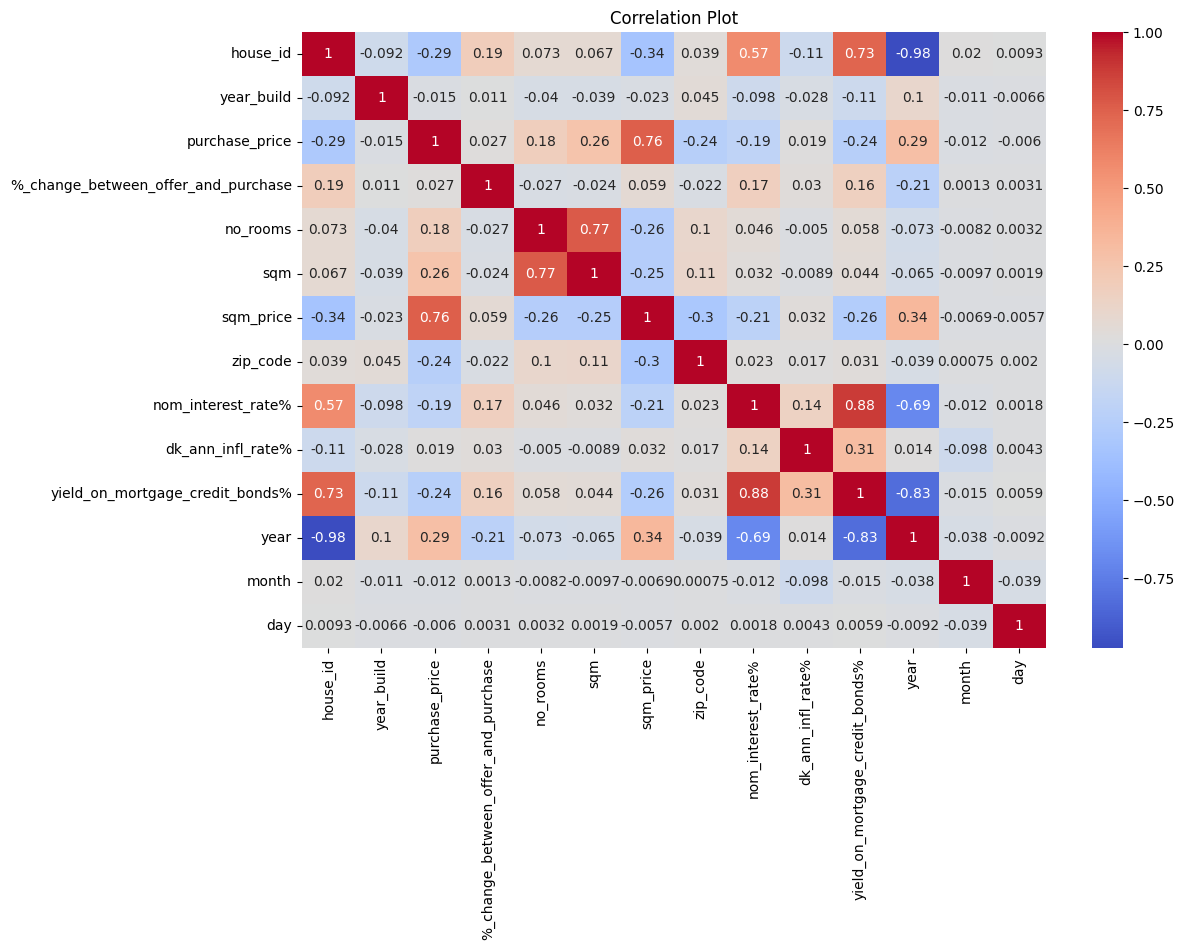

In [30]:
# Plot correlation between independent features and target variable
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

### Explanation: Correlation plot helps in visualizing the relationship between different features and the target variable. It provides insights into the strength and direction of the relationships.

## Visualizations and Other Plots for Analysis and Data Preprocessing

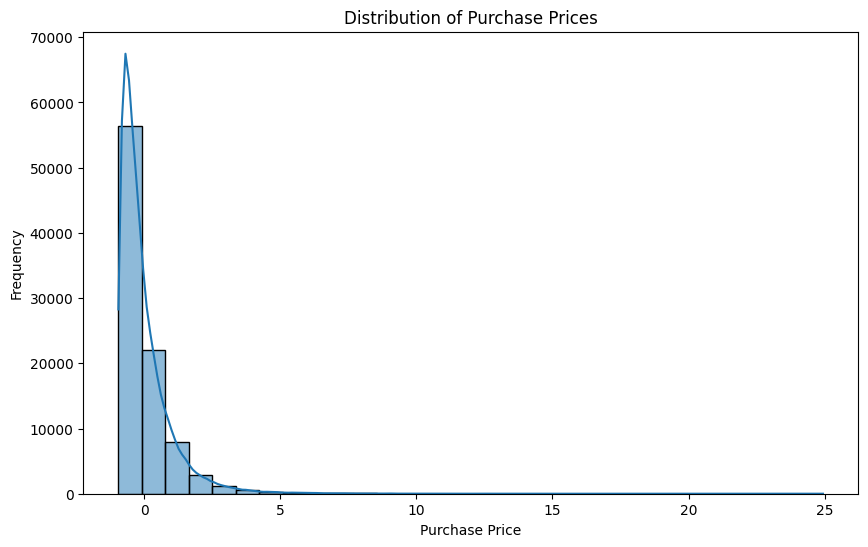

In [31]:
# Distribution of purchase prices
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_price'], bins=30, kde=True)
plt.title('Distribution of Purchase Prices')
plt.xlabel('Purchase Price')
plt.ylabel('Frequency')
plt.show()

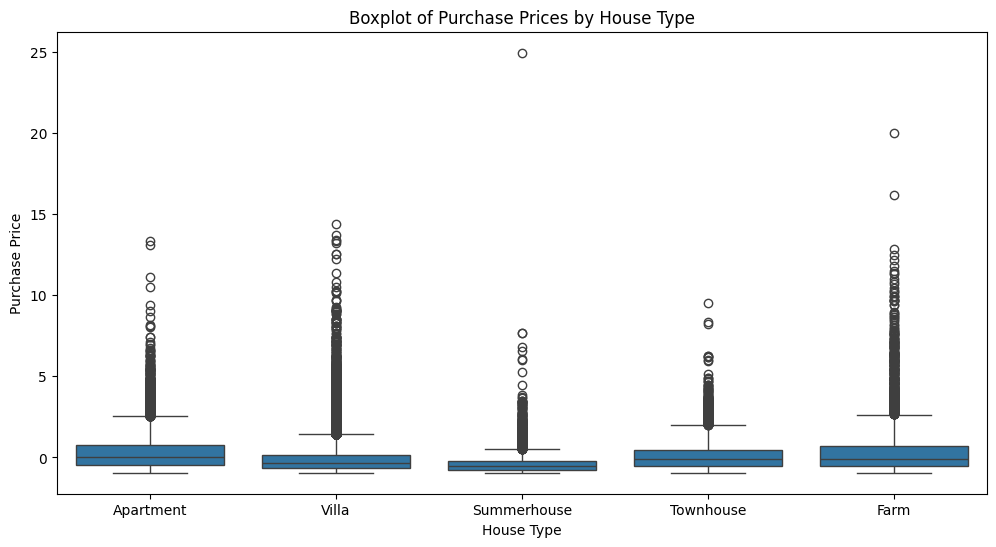

In [32]:
# Boxplot of purchase prices by house type
plt.figure(figsize=(12, 6))
sns.boxplot(x='house_type', y='purchase_price', data=df)
plt.title('Boxplot of Purchase Prices by House Type')
plt.xlabel('House Type')
plt.ylabel('Purchase Price')
plt.show()

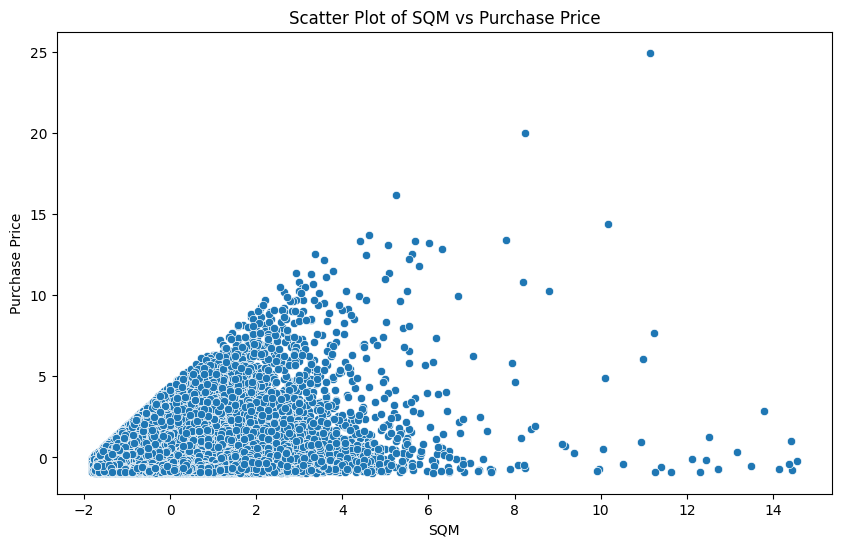

In [33]:
# Scatter plot of sqm vs purchase price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqm', y='purchase_price', data=df)
plt.title('Scatter Plot of SQM vs Purchase Price')
plt.xlabel('SQM')
plt.ylabel('Purchase Price')
plt.show()

### Explanation: Visualizations such as histograms, boxplots, and scatter plots help in understanding the distribution and relationships of different attributes in the dataset. They provide valuable insights for data preprocessing and analysis.

## Techniques Used in Feature Engineering

- Identification of attribute types
- Handling missing data using imputation
- Normalization of numeric attributes
- Analysis of most expensive cities and cities with maximum unique zip codes
- Proximity measures between specified columns
- Feature selection using filter methods (f_regression, mutual_info_regression, correlation)
- Comparison of feature selection methods
- Correlation plot
- Visualizations (histograms, boxplots, scatter plots)
- Handling outliers using z-score approach

## Summary

In this notebook, we performed feature engineering tasks on the DK housing prices dataset. We started by identifying the types of attributes and handling missing data using imputation. We then normalized the numeric attributes to improve the performance of machine learning algorithms. We analyzed the 5 most expensive cities and cities with maximum unique zip codes to understand the distribution of house prices and the diversity of locations.

We calculated proximity measures between house_type and sqm, house_type and purchase_price, and no_rooms and purchase_price to understand the relationship between different attributes. We performed feature selection using three filter methods (f_regression, mutual_info_regression, and correlation) to identify the most relevant features for predicting the target variable. We also compared the top 5 features from each method to understand the consistency and differences between the methods. We plotted the correlation between independent features and the target variable to visualize the relationships.

We created visualizations such as histograms, boxplots, and scatter plots to understand the distribution and relationships of different attributes in the dataset. We handled outliers using the z-score approach to maintain the integrity of the dataset. Finally, we summarized the techniques used in feature engineering, including identification of attribute types, handling missing data, normalization, analysis, proximity measures, feature selection, comparison of feature selection methods, correlation plot, visualizations, and handling outliers.

## Understanding the Most Important Feature

Based on the feature selection methods, the most important feature for predicting the purchase price is the 'sqm' (square meters) of the house. This is because the size of the house is directly related to its value. Larger houses tend to have higher purchase prices, making 'sqm' a crucial factor in determining the price. Additionally, the 'sqm' feature consistently appeared in the top features selected by different methods, further emphasizing its importance.